In [ ]:
#installing kaggle 
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#mounting google drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#making a directory
!mkdir ~/.kaggle

In [ ]:
# COPY CONTENT BELOW IN A JSON AND NAME IT kaggle.json
# {"username":"varshapwalia","key":"f740f4ae05dd367aa8698235a1e924da"}

In [ ]:
# UPLOAD THE kaggle.json in files and run the below cmds

In [ ]:
! cp kaggle.json ~/.kaggle/kaggle.json

In [ ]:
 #downloading Dataset1
! kaggle datasets download grassknoted/asl-alphabet

100% 1.03G/1.03G [00:26<00:00, 43.4MB/s]
100% 1.03G/1.03G [00:26<00:00, 41.2MB/s]


In [ ]:
#Unzipping the dataset 1
! unzip asl-alphabet.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tr

In [ ]:
#Downloading Dataset 2
# ! kaggle datasets download ayuraj/american-sign-language-dataset

In [ ]:
#uniziping Dataset 2
# ! unzip american-sign-language-dataset.zip

In [ ]:
#Downloading Dataset 3
# ! kaggle datasets download ayuraj/asl-dataset

In [ ]:
# Unziping dataset 3
# ! unzip asl-dataset.zip

In [ ]:
import os

In [ ]:
folder_array = os.listdir('/content/asl_alphabet_train/asl_alphabet_train')
print(folder_array, type(folder_array))

['X', 'J', 'B', 'O', 'K', 'Y', 'U', 'T', 'P', 'S', 'F', 'C', 'E', 'D', 'del', 'Z', 'R', 'nothing', 'V', 'Q', 'space', 'H', 'L', 'W', 'M', 'A', 'G', 'N', 'I'] <class 'list'>


In [ ]:
# Reduce Folder images size
from random import sample

for i in folder_array:
  # making folder path
  class_folder_path='/content/asl_alphabet_train/asl_alphabet_train/'+str(i)

  files = os.listdir(class_folder_path)
  for temp_file in sample(files, 2600):
    # print(temp_file)
    os.remove(class_folder_path+'/'+temp_file)

In [ ]:
from random import sample

for i in folder_array:
  # making folder path
  class_folder_path='/content/asl_alphabet_train/asl_alphabet_train/'+str(i)
  
  # folder 
  print(class_folder_path)
  
  # counter per folder
  _, _, files = next(os.walk(class_folder_path))
  file_count = len(files)
  print(file_count)

/content/asl_alphabet_train/asl_alphabet_train/X
150
/content/asl_alphabet_train/asl_alphabet_train/J
150
/content/asl_alphabet_train/asl_alphabet_train/B
150
/content/asl_alphabet_train/asl_alphabet_train/O
150
/content/asl_alphabet_train/asl_alphabet_train/K
150
/content/asl_alphabet_train/asl_alphabet_train/Y
150
/content/asl_alphabet_train/asl_alphabet_train/U
150
/content/asl_alphabet_train/asl_alphabet_train/T
150
/content/asl_alphabet_train/asl_alphabet_train/P
150
/content/asl_alphabet_train/asl_alphabet_train/S
150
/content/asl_alphabet_train/asl_alphabet_train/F
150
/content/asl_alphabet_train/asl_alphabet_train/C
150
/content/asl_alphabet_train/asl_alphabet_train/E
150
/content/asl_alphabet_train/asl_alphabet_train/D
150
/content/asl_alphabet_train/asl_alphabet_train/del
150
/content/asl_alphabet_train/asl_alphabet_train/Z
150
/content/asl_alphabet_train/asl_alphabet_train/R
150
/content/asl_alphabet_train/asl_alphabet_train/nothing
150
/content/asl_alphabet_train/asl_alphab

In [ ]:
# os.listdir('/content/asl_dataset/asl_dataset')

In [ ]:
# os.listdir('/content/asl/asl')

In [ ]:
from torch.utils.data import dataloader
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torchvision.datasets as datasets

dataset_1_path = '/content/asl_alphabet_train/asl_alphabet_train'
# dataset_2_path = '/content/asl_dataset/asl_dataset'
# dataset_3_path = '/content/asl/asl'

def get_dataset_for_normalization_values(data_path):
  dataset_training_transforms = transforms.Compose([
      transforms.Resize((224,224)),
      transforms.ToTensor()
  ])
  train_dataset = torchvision.datasets.ImageFolder(root=data_path, transform= dataset_training_transforms)
  dataset = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle = False)
  return dataset

dataset_1 = get_dataset_for_normalization_values(dataset_1_path)
# dataset_2 = get_dataset_for_normalization_values(dataset_2_path)
# dataset_3 = get_dataset_for_normalization_values(dataset_3_path)


In [ ]:
def get_mean_and_std(loader):
  mean = 0
  std = 0
  total_image_count = 0
  for images, _ in loader:
    image_count_in_a_batch = images.size(0)
    images = images.view(image_count_in_a_batch,images.size(1), -1)
    mean += images.mean(2).sum(0)
    std += images.std(2).sum(0)
    total_image_count += image_count_in_a_batch
    
  mean /= total_image_count
  std /= total_image_count

  return mean,std

In [ ]:
mean_1, std_1 = get_mean_and_std(dataset_1)

In [ ]:
# mean_2, std_2 = get_mean_and_std(dataset_2)

In [ ]:
# mean_3, std_3 = get_mean_and_std(dataset_3)

In [ ]:

def load_dataset(path, test_split, val_split, batch_size, input_size, mean_val, std_dev, len_size_flag):

    transform_dict = {'src' : transforms.Compose(
        [transforms.Resize(input_size),
         transforms.RandomHorizontalFlip(p=.25),
         transforms.RandomRotation(degrees=15),
        #  transforms.RandomVerticalFlip(p=.25),
         transforms.ToTensor(),
         transforms.Normalize(mean = mean_val, std = std_dev)])}
    
    data = datasets.ImageFolder(root = path, transform= transform_dict['src'])
    train_size = int(len(data)*(1-(test_split + val_split)))
    test_size = int(len(data)*test_split) 
    val_size = int(len(data)*val_split)

    print(data)
    print("SPLIT COUNTS", train_size,test_size,val_size)
    # logically the data was not fitting into the total logic of split so had to make the change, becuase of even and odd number of files.
    if len_size_flag:
      val_size=val_size+1
  
    
    train, test, val = torch.utils.data.random_split(data,[train_size, test_size, val_size])
    data_loader_train = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True, drop_last=False, num_workers = 0)
    data_loader_test = torch.utils.data.DataLoader(test, batch_size= batch_size, shuffle=True, drop_last=False, num_workers = 0)
    data_loader_val = torch.utils.data.DataLoader(val, batch_size= batch_size, shuffle=True, drop_last=False, num_workers = 0)
  
    return data_loader_train, data_loader_test, data_loader_val

In [ ]:
training_1, testing_1, validation_1 = load_dataset(path=dataset_1_path, test_split=0.3, val_split=0.1, batch_size=64, input_size=(224,224), mean_val=mean_1, std_dev=std_1, len_size_flag=False)

Dataset ImageFolder
    Number of datapoints: 4350
    Root location: /content/asl_alphabet_train/asl_alphabet_train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.25)
               RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
               Normalize(mean=tensor([0.5194, 0.4997, 0.5150]), std=tensor([0.2043, 0.2331, 0.2418]))
           )
SPLIT COUNTS 2610 1305 435


In [ ]:
# training_2, testing_2, validation_2 = load_dataset(path=dataset_2_path, test_split=0.3, val_split=0.1, batch_size=32, input_size=(224,224), mean_val=mean_2, std_dev=std_2, len_size_flag=True)

In [ ]:
# training_3, testing_3, validation_3 = load_dataset(path=dataset_3_path, test_split=0.3, val_split=0.1, batch_size=64, input_size=(224,224), mean_val=mean_3, std_dev=std_3, len_size_flag=True)

In [ ]:
def plot_data_loader(data_loader, gridDims):
    
    fig, axes = plt.subplots(nrows=gridDims[0], ncols=gridDims[1], figsize=(5,5))
    dataiter = iter(data_loader)
    for i in range(gridDims[0]):
        for j in range(gridDims[1]):
            images, _ = dataiter.next()
            axes[i, j].imshow(np.transpose(images[0].numpy(), (1, 2, 0)))

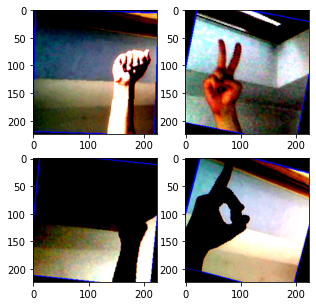

In [ ]:
plot_data_loader(training_1, (2,2))

In [ ]:
# plot_data_loader(training_2, (2,2))

In [ ]:
# plot_data_loader(training_3, (2,2))